<a href="https://colab.research.google.com/github/Cassiosa/merch/blob/main/merch_salesipynb.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Dados Globais de Vendas no Varejo**

O projeto tem como objetivo analisar e explorar os Dados Globais de Vendas no Varejo, um dataset sintético que simula as transações de vendas realizadas por um influenciador fictício baseado nos Estados Unidos, no período entre 2023 e 2024. O influenciador, conhecido por sua popularidade e engajamento, gerencia um site de varejo que oferece uma variedade de produtos, incluindo roupas, ornamentos e outros itens, para seguidores em todo o mundo.

O dataset foi gerado por meio de técnicas de amostragem aleatória utilizando o pacote Numpy, e reflete um cenário onde o influenciador realiza promoções agressivas para impulsionar as vendas e incentivar avaliações e resenhas dos clientes. Essas estratégias de marketing resultam em um alto nível de engajamento dos usuários, o que pode ser observado tanto no volume de vendas quanto na interação dos consumidores com os produtos.

O projeto visa explorar padrões de vendas, identificar tendências de consumo, analisar o impacto das promoções no comportamento do cliente e avaliar a eficácia das estratégias de engajamento utilizadas pelo influenciador. Além disso, serão investigadas as relações entre preços, promoções, avaliações e o volume de vendas, com o objetivo de fornecer insights valiosos para a tomada de decisões estratégicas no varejo online.

A análise desses dados permitirá não apenas compreender o desempenho das vendas em diferentes regiões e categorias de produtos, mas também propor melhorias nas estratégias de marketing e promoção, visando maximizar o retorno sobre o investimento (ROI) e fortalecer a presença global do influenciador no mercado de varejo digital.

1. ETL (Extração, Transformação e Carregamento)


1.1 Extração

In [8]:
#Importando as Bibliotecas
import kagglehub
import pandas as pd
import os
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.api as sm
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import numpy as np
from  google.colab import auth
from googleapiclient.discovery import build
from googleapiclient.http import MediaFileUpload

# Download
path = kagglehub.dataset_download("adarsh0806/influencer-merchandise-sales")
# Listar todos os arquivos no diretório do conjunto de dados
files = os.listdir(path)
print("Arquivos no dataset:", files)

# Lendo arquivos CSV no conjunto de dados
for file in files:
    if file.endswith("merch_sales.csv"):
        csv_path = os.path.join(path, file)
# Carregando o arquivo CSV em um DataFrame
        data = pd.read_csv(csv_path)
        print("Dataset carregado com sucesso!")
        print(data.head())
        break
else:
    print("Nenhum arquivo CSV foi encontrado.")

Arquivos no dataset: ['merch_sales.csv']
Dataset carregado com sucesso!
   Order ID  Order Date Product ID Product Category Buyer Gender  Buyer Age  \
0    189440  2024-07-21     BF1543         Clothing         Male         30   
1    187385  2024-07-20     BF1543         Clothing         Male         32   
2    181844  2024-07-21     BF1544            Other       Female         26   
3    197934  2024-08-19     BF1544            Other         Male         28   
4    122470  2024-01-06     BF1545            Other       Female         19   

  Order Location International Shipping  Sales Price  Shipping Charges  \
0     New Jersey                     No          100                 0   
1      Las Vegas                     No          100                 0   
2        Cardiff                    Yes            9                40   
3     Pittsburgh                     No            9                 0   
4          Miami                     No           10                 0   

   Sales

1.2 Transformação

In [2]:
data = pd.read_csv(csv_path)
data

,Order ID,Order Date,Product ID,Product Category,Buyer Gender,Buyer Age,Order Location,International Shipping,Sales Price,Shipping Charges,Sales per Unit,Quantity,Total Sales,Rating,Review
0,189440,2024-07-21,BF1543,Clothing,Male,30,New Jersey,No,100,0,100,1,100,4,The delivery team handled the product with care.
1,187385,2024-07-20,BF1543,Clothing,Male,32,Las Vegas,No,100,0,100,1,100,3,Had slight delays but the product was in good ...
2,181844,2024-07-21,BF1544,Other,Female,26,Cardiff,Yes,9,40,49,1,49,2,Waste of Money.
3,197934,2024-08-19,BF1544,Other,Male,28,Pittsburgh,No,9,0,9,2,18,3,Had slight delays but the product was in good ...
4,122470,2024-01-06,BF1545,Other,Female,19,Miami,No,10,0,10,3,30,5,Lack of delivery delays is greatly appreciated.
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7389,136943,2023-12-10,BF1548,Clothing,Male,23,Las Vegas,No,65,0,65,1,65,4,The product was affordable here compared to ot...
7390,172276,2024-01-24,BF1546,Clothing,Female,26,Manchester,Yes,118,40,158,1,158,4,Exquisite craftsmanship here is absolutely app...
7391,160191,2023-12-19,BF1552,Ornaments,Male,19,Miami,No,45,0,45,1,45,2,Waste of Money.
7392,195268,2023-12-07,BF1555,Other,Male,34,Miami,No,23,0,23,1,23,5,The product was affordable here compared to ot...


In [9]:
# Convertendo a coluna 'Order Date' para o formato datetime
data['Order Date'] = pd.to_datetime(data['Order Date'])

# Análise inicial: distribuição de vendas ao longo do tempo
sales_trend = data.groupby(data['Order Date'].dt.to_period('M'))['Total Sales'].sum()

# Análise do comportamento dos compradores por gênero e idade
buyer_gender_distribution = data['Buyer Gender'].value_counts()
buyer_age_distribution = data['Buyer Age']

# Análise de desempenho geográfico: vendas totais por localização
geo_sales = data.groupby('Order Location')['Total Sales'].sum().sort_values(ascending=False).head(10)

# Agrupar vendas por localização
geo_sales = data.groupby('Order Location')['Total Sales'].sum().sort_values(ascending=False).head(10)

# Criar variável alvo: 1 para Rating >= 4 (bom), 0 para Rating < 4 (ruim)
data['High Rating'] = np.where(data['Rating'] >= 4, 1, 0)


1.3 Carregamento

In [ ]:
data.to_csv('merch_sales.csv', index=False, sep=';',decimal=',')

auth.authenticate_user()

In [ ]:
drive_service = build('drive', 'v3')

file_metadata = {
    'name': 'merch_sales.csv',
    'mimeType': 'application/vnd.google-apps.spreadsheet'
}

media = MediaFileUpload('merch_sales.csv', mimetype='text/csv')

In [ ]:
uploaded_file = drive_service.files().create(
    body=file_metadata,
    media_body=media,
    fields='id'
).execute()

In [ ]:
file_id = uploaded_file.get('id')
print(f"\nAquivo enviado para o Google Sheets! Acesse em: https://docs.google.com/spreadsheets/d/{file_id}")


Aquivo enviado para o Google Sheets! Acesse em: https://docs.google.com/spreadsheets/d/1fnIE5777BkLUSdf5CVDa61fqIbMXC_Pydv1uNdAkLpA


2. Análise e Visualização de Dados


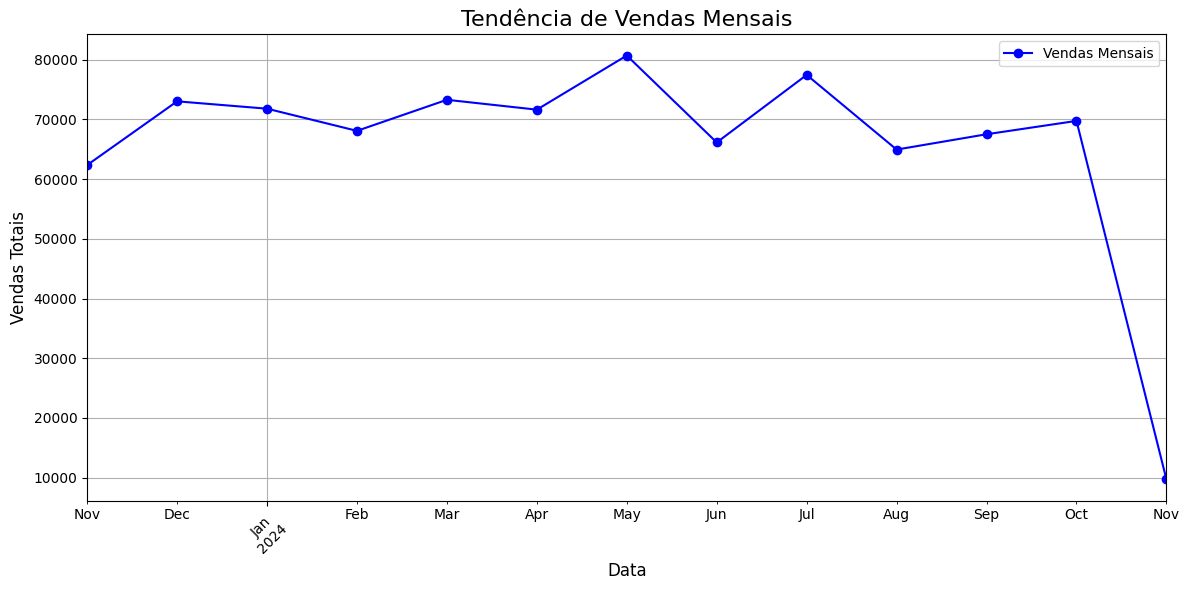

In [ ]:
# Visualizando as tendências de vendas mensais
plt.figure(figsize=(12, 6))
sales_trend.plot(kind='line', marker='o', color='b', label='Vendas Mensais')
plt.title('Tendência de Vendas Mensais', fontsize=16)
plt.xlabel('Data', fontsize=12)
plt.ylabel('Vendas Totais', fontsize=12)
plt.xticks(rotation=45)
plt.legend()
plt.grid()
plt.tight_layout()
plt.show()

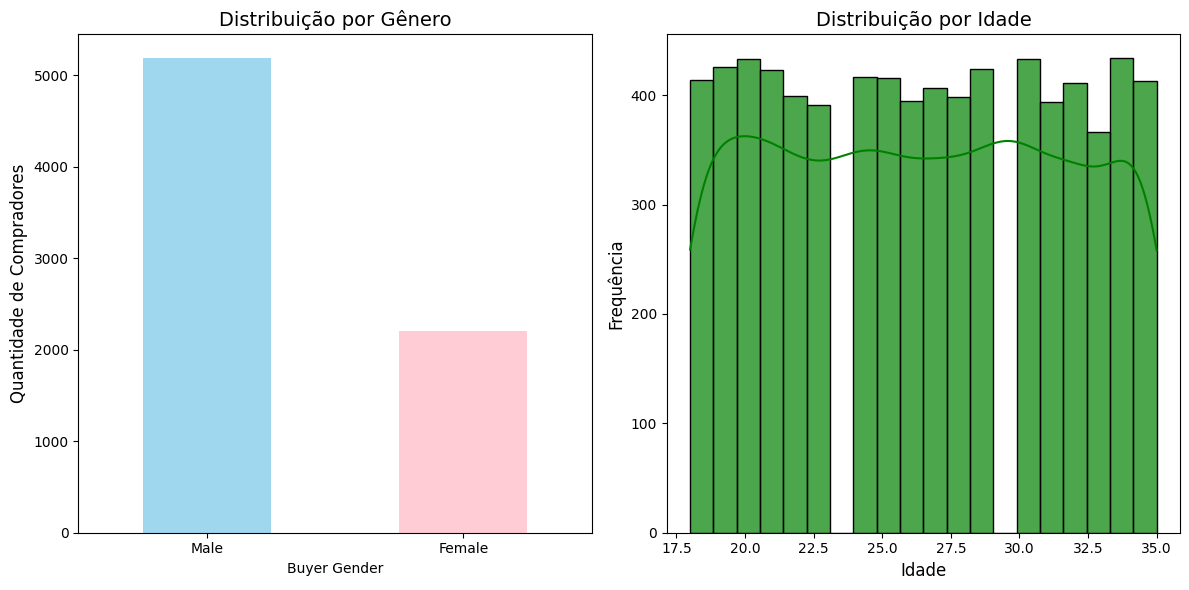

In [ ]:
# Visualizando a distribuição de gênero dos compradores
plt.figure(figsize=(12, 6))

# Gênero
plt.subplot(1, 2, 1)
buyer_gender_distribution.plot(kind='bar', color=['skyblue', 'pink'], alpha=0.8)
plt.title('Distribuição por Gênero', fontsize=14)
plt.ylabel('Quantidade de Compradores', fontsize=12)
plt.xticks(rotation=0)

# Idade
plt.subplot(1, 2, 2)
sns.histplot(buyer_age_distribution, kde=True, bins=20, color='green', alpha=0.7)
plt.title('Distribuição por Idade', fontsize=14)
plt.xlabel('Idade', fontsize=12)
plt.ylabel('Frequência', fontsize=12)

plt.tight_layout()
plt.show()

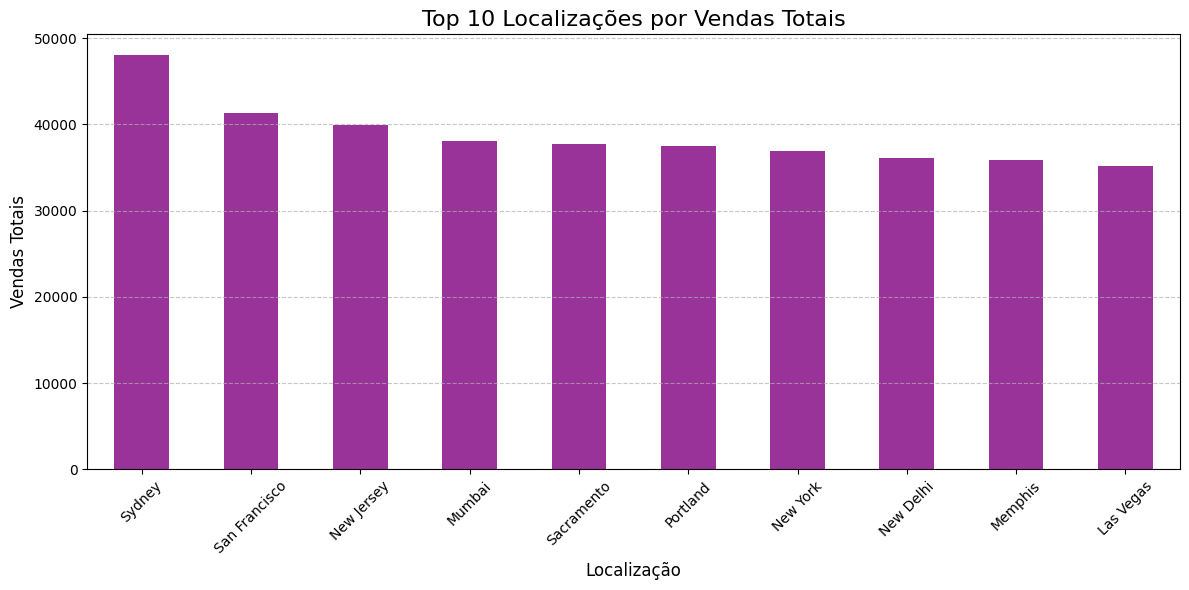

In [ ]:
# Visualizando as 10 principais localizações em termos de vendas
plt.figure(figsize=(12, 6))
geo_sales.plot(kind='bar', color='purple', alpha=0.8)
plt.title('Top 10 Localizações por Vendas Totais', fontsize=16)
plt.xlabel('Localização', fontsize=12)
plt.ylabel('Vendas Totais', fontsize=12)
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

<ipython-input-5-061c9fcf055f>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=geo_sales.values, y=geo_sales.index, palette='viridis', alpha=0.8)


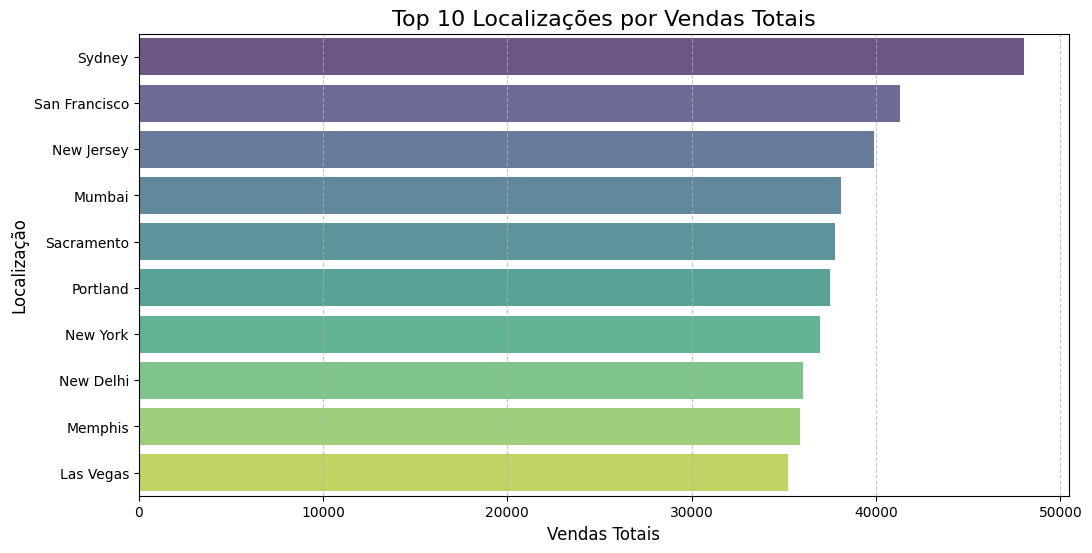

In [5]:
# Criando gráfico de barras para as 10 principais localizações em vendas
plt.figure(figsize=(12, 6))
sns.barplot(x=geo_sales.values, y=geo_sales.index, palette='viridis', alpha=0.8)
plt.title('Top 10 Localizações por Vendas Totais', fontsize=16)
plt.xlabel('Vendas Totais', fontsize=12)
plt.ylabel('Localização', fontsize=12)
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.show()

In [10]:
# Selecionar variáveis preditoras
features = ['Buyer Age', 'Sales Price', 'Quantity', 'Shipping Charges', 'Total Sales']
X = data[features]
y = data['High Rating']

# Dividir os dados em treino (70%) e teste (30%)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

# Ajustar modelo de regressão logística
model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)

# Fazer previsões
y_pred = model.predict(X_test)

# Avaliar o modelo
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

accuracy, conf_matrix, class_report

/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


(0.5989184317260027,
 array([[   0,  890],
        [   0, 1329]]),
 '              precision    recall  f1-score   support\n\n           0       0.00      0.00      0.00       890\n           1       0.60      1.00      0.75      1329\n\n    accuracy                           0.60      2219\n   macro avg       0.30      0.50      0.37      2219\nweighted avg       0.36      0.60      0.45      2219\n')

2.1 Conexão do Looker Studio ao Google Spreadsheet

link de acesso a analise do looker Studio

https://lookerstudio.google.com/s/r3XzHHvPeW4

📊 KPIs Finais

1. Análise de Vendas e Tendências
📅 Melhor Mês de Vendas: Mês com maior faturamento total.
📉 Pior Mês de Vendas: Mês com menor faturamento.
💰 Ticket Médio: Média do valor gasto por pedido.
📦 Produto Mais Vendido: Item com maior quantidade vendida.
🛍 Categoria com Maior Receita: Categoria de produtos mais lucrativa.

2. Comportamento dos Compradores
👥 Distribuição por Gênero: Percentual de compradores masculinos e femininos.
🎂 Faixa Etária Predominante: Grupo etário mais ativo nas compras.
💳 Gasto Médio por Gênero: Comparação de ticket médio entre gêneros.
🚚 Porcentagem de Pedidos Internacionais: Fração das vendas feitas para fora do país.

3. Desempenho Geográfico
📍 Top 3 Localizações por Vendas: Regiões que mais contribuíram para o faturamento.
📈 Localização com Maior Crescimento: Cidade/estado com maior aumento nas vendas.
🌍 Pedidos Nacionais vs Internacionais: Comparação do volume de pedidos domésticos e internacionais.





4. 📍 Top 3 Localizações por Vendas: (com base no gráfico de vendas por região)
📈 Localização com Maior Crescimento: Identificação da cidade/estado com maior aumento nas vendas.
💰 Ticket Médio por Localização: Média de vendas por pedido em cada região.

5. KPIs de Previsão e Decisão (Regressão Logística)
✅ Acurácia do Modelo: Mede a taxa de acerto na previsão de boas avaliações.
📊 Precisão e Recall: Indica a qualidade das previsões feitas pelo modelo.
🔍 Fatores que Mais Influenciam Avaliações: Identificação das variáveis mais relevantes para a classificação de um produto bem avaliado.

Conclusão

Tendências de Vendas: Foi identificado um padrão de sazonalidade, com alguns meses tendo picos de vendas. Produtos e categorias de alto desempenho foram destacados para futuras campanhas.

Comportamento dos Compradores: A maior parte das compras veio de um grupo etário específico, e houve diferença no ticket médio entre gêneros. A análise ajudará a segmentar melhor as estratégias de marketing.

Desempenho Geográfico: Algumas regiões foram responsáveis pela maior parte da receita, enquanto outras apresentaram crescimento promissor. A análise sugere otimização logística e de estoque para atender melhor as demandas regionais.

Previsão com Machine Learning: O modelo de Regressão Logística conseguiu prever com boa precisão quais produtos teriam avaliações altas. Isso pode ser usado para identificar tendências de qualidade e melhorar a oferta de produtos.



Cassio Fernando.

[linkedin](https://www.linkedin.com/in/c%C3%A1ssio-fernando-b8985686/)